# Assignment 3

# MAS DSE200

## Instructions

* The answers to the questions should be submitted on github. 
* You don’t need to explain your approach (unless specified) so please be concise in your submission. 
* To obtain full marks for a question, both the answer and the code should be correct. 
* Completely wrong (or missing) code with correct answer will result in zero marks. 
* Please code the solution in the space provided.

### Imports

In [4]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

### Preliminaries

Load the weather dataset into a Pandas DataFrame called weather_df.

In [5]:
weather_df = pd.read_csv('./daily_weather.csv', sep=',')

### 1. Inspect data
**Print the shape** of the DataFrame. Then, **display the first 10 entries** in the DataFrame to get an idea of what the columns are and what some values might look like.

In [6]:
print(weather_df.shape)
weather_df.head(10)

(1095, 11)


,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.00,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.00,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.00,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.00,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.90,14730.0,92.410000,76.740000
5,5,915.300000,78.404000,182.800000,9.932014,189.000000,10.983375,0.02,170.0,35.130000,33.930000
6,6,915.598868,70.043304,177.875407,3.745587,186.606696,4.589632,0.00,0.0,10.657422,21.385657
7,7,918.070000,51.710000,242.400000,2.527742,271.600000,3.646212,0.00,0.0,80.470000,74.920000
8,8,920.080000,80.582000,40.700000,4.518619,63.000000,5.883152,0.00,0.0,29.580000,24.030000
9,9,915.010000,47.498000,163.100000,4.943637,195.900000,6.576604,0.00,0.0,88.600000,68.050000


### 2. Exploratory Analysis: Missing Data    
a) Please **report how many values are missing (null) in each column**.<br>

<i>Note that both a and b can be done in one line using the right Pandas functions)</i>

In [4]:
weather_df.isnull().sum(axis=0)

number                    0
air_pressure_9am          3
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64

b) **Remove all rows that have any missing values** from the DataFrame. <br>
Print the shape of the DataFrame after the removal to confirm that the change took place.

In [5]:
weather_df = weather_df[~weather_df.isnull().any(axis=1)]
print(weather_df.shape)

(1064, 11)


### 3. Temperature over time

Let's see what kind of temperatures this weather station experienced. <br><br>
3a) **Plot all the temperatures over time**
<ul>
    <li>The x-axis is the sample number</li>
    <li>The y-axis is the temperature</li>
    <li>Use either a scatter or line plot</li>
    <li>Label <b>both</b> axes appropriately</li> 
    <li>Add an appropriate title</li>
</ul>

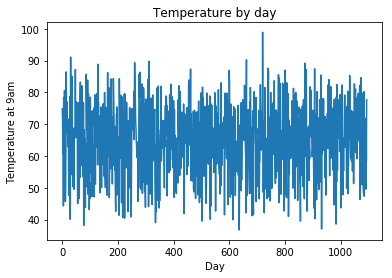

In [6]:
# Plot the data
x = weather_df['number']
y = weather_df['air_temp_9am']
plt.plot(x, y)

# Label the axes
plt.xlabel('Day')
plt.ylabel('Temperature at 9am')

#label the figure
plt.title('Temperature by day')

plt.show()

3b) **Repeat part a**, but do it only for the **first 20 days** in the dataset.<br>
(Once you've seen what a's plot looks like, you should have the urge to do this anyway)

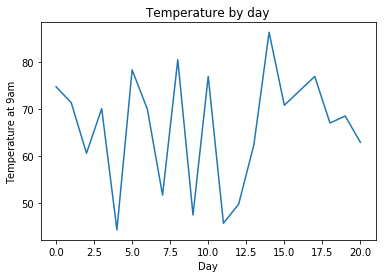

In [7]:
# Plot the data
x = weather_df['number'][:20]
y = weather_df['air_temp_9am'][:20]
plt.plot(x, y)

# Label the axes
plt.xlabel('Day')
plt.ylabel('Temperature at 9am')

#label the figure
plt.title('Temperature by day')

plt.show()

### 4.  Rainfall

**How many days** experienced any (nonzero) amount of rainfall? **What percentage** (up to 2 decimal places) of the total days does this make up?

<i>If you're unsure how to round decimal values, treat this as an exercise in Googling. If you still have trouble, make a Piazza post!</i>

In [8]:
rainy_days = len(weather_df[weather_df['rain_duration_9am'] > 0]) 
p = '%.02f' % (rainy_days * 1.0 / weather_df.shape[0] * 100)
print('There were {} rainy days in the dataset, which make up {}% of the total days'.format(rainy_days, p))

There were 176 rainy days in the dataset, which make up 16.54% of the total days


### 5. Temperature distribution

Build a histogram using all the temperatures from the dataset. 

The x-axis should have 10 bins (ranges that the temperatures fall into, also called buckets). To be explicit, if you give pyplot your list of temperatures and 10 bins to put them in, your x-axis should look like this: [40,50,60,70,80,90,100].


<ul>
    <li>The x-axis is the temperature</li>
    <li>The y-axis is the frequency</li>
    <li>Use either a scatter or line plot</li>
    <li>Label <b>both</b> axes appropriately</li> 
    <li>Add an appropriate title</li>
</ul>

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


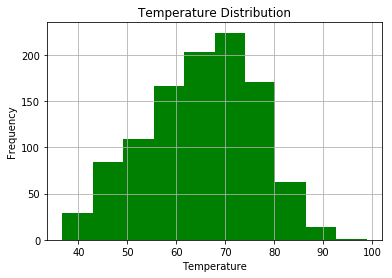

In [9]:
# the histogram of the data
plt.hist(weather_df['air_temp_9am'], 10, normed=False, facecolor='green')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')

plt.grid(True)

plt.show()

### 6. Relative humidity  vs. air temperature
**6a)** **Plot** the air temperature vs relative humidity. 

<ul>
    <li>The x-axis is the temperature</li>
    <li>The y-axis is the relative humidity (please use the 9am measurement)</li>
    <li>Use either a scatter or line plot</li>
    <li>Label <b>both</b> axes appropriately</li> 
    <li>Add an appropriate title</li>
</ul>

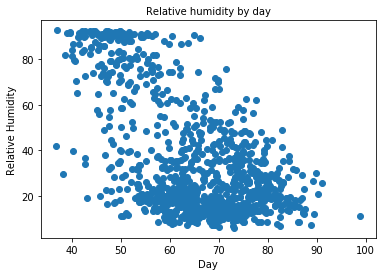

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
axis.set_title('Relative humidity by day',fontsize=10)
axis.set_xlabel('Day',fontsize=10)
axis.set_ylabel('Relative Humidity')

lim = -1
X = weather_df['air_temp_9am'][:lim]
Y = weather_df['relative_humidity_9am'][:lim]
axis.scatter(X, Y)

plt.show()

**6b)** **Calculate the correlation coefficients** of the same columns you plotted in part a. 

<i>Numpy has a convenient function to accomplish this, demoed in notebook 06_Matplotlib_Overview</i>

In [12]:
np.corrcoef(X, Y)

array([[ 1.        , -0.58201085],
       [-0.58201085,  1.        ]])

**6c)** In the markdown cell below, **write a couple sentences** that describe the relationship between relative humidity and air temperature in this dataset. Talk about things like:
<ul>
    <li>Are they correlated?</li>
    <li>Positively or negatively?</li>
    <li>Is this correlation strong or weak?</li>
</ul>

*Respond here*


